<a href="https://colab.research.google.com/github/OshiMC/DrawingRecognition_For_DS_Children_ML_Model/blob/main/DrawingRecognition_For_DS_Children.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Nov 26 05:11:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)



2.19.0


In [ ]:
!pip install scikit-learn
!pip install opencv-python
!pip install matplotlib
!pip install pandas
!pip install pillow
!pip install tensorflow_decision_forests
!pip install tflite-support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.3/390.3 kB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for tflite-support: filename=tflite_support-0.1.0a1-cp312-cp312-linux_x86_64.whl size=6042505 sha256=94af26736c95c9248a87a8fadc58a08f76213e2c84d96021fd5b1b2e1d8b6268
  Stored in directory: /root/.cache/pip/wheels/5d/6f/bc/8b85ad0e51d3c8f82c590b321f2c5b35c41fbe84ad93271397
Successfully built tflite-support


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from pathlib import Path

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")



TensorFlow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
IMAGE_SIZE = (224, 224)

train_path = '/content/drive/MyDrive/Dataset/Training Data'
valid_path = '/content/drive/MyDrive/Dataset/Testing Data'




In [ ]:
import os

def explore_dataset(train_path, valid_path):
    """Explore and understand your dataset structure"""
    print("=" * 50)
    print("DATASET EXPLORATION")
    print("=" * 50)

    # Training data
    train_classes = os.listdir(train_path)
    print(f"\n📁 Training Data Path: {train_path}")
    print(f"Number of classes: {len(train_classes)}")
    print(f"Classes: {train_classes}\n")

    for class_name in train_classes:
        class_path = os.path.join(train_path, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            print(f"  ├── {class_name}: {num_images} images")

    # Validation data
    print(f"\n📁 Validation Data Path: {valid_path}")
    valid_classes = os.listdir(valid_path)
    print(f"Number of classes: {len(valid_classes)}")
    print(f"Classes: {valid_classes}\n")

    for class_name in valid_classes:
        class_path = os.path.join(valid_path, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            print(f"  ├── {class_name}: {num_images} images")

    print("\n" + "=" * 50)
    # Run exploration
explore_dataset(train_path, valid_path)

DATASET EXPLORATION

📁 Training Data Path: /content/drive/MyDrive/Dataset/Testing Data
Number of classes: 26
Classes: ['z.letter z', 'y.letter y', 'w.watch', 't.triangle', 'v.vehicle', 'u.umbrella', 's.star', 'x.letter X', 'r.rectangle', 'q.letter Q', 'p.pencil', 'n.net', 'o.number One', 'l.leaf', 'k.kite', 'm.mango', 'j.jug', 'g.glass', 'i.ice cream', 'h.house', 'f.flower', 'e.eye', 'd.door', 'c.circle', 'b.bag', 'a.apple']

  ├── z.letter z: 20 images
  ├── y.letter y: 20 images
  ├── w.watch: 20 images
  ├── t.triangle: 20 images
  ├── v.vehicle: 20 images
  ├── u.umbrella: 20 images
  ├── s.star: 20 images
  ├── x.letter X: 20 images
  ├── r.rectangle: 20 images
  ├── q.letter Q: 20 images
  ├── p.pencil: 20 images
  ├── n.net: 20 images
  ├── o.number One: 20 images
  ├── l.leaf: 20 images
  ├── k.kite: 20 images
  ├── m.mango: 20 images
  ├── j.jug: 20 images
  ├── g.glass: 20 images
  ├── i.ice cream: 20 images
  ├── h.house: 20 images
  ├── f.flower: 20 images
  ├── e.eye: 20 i

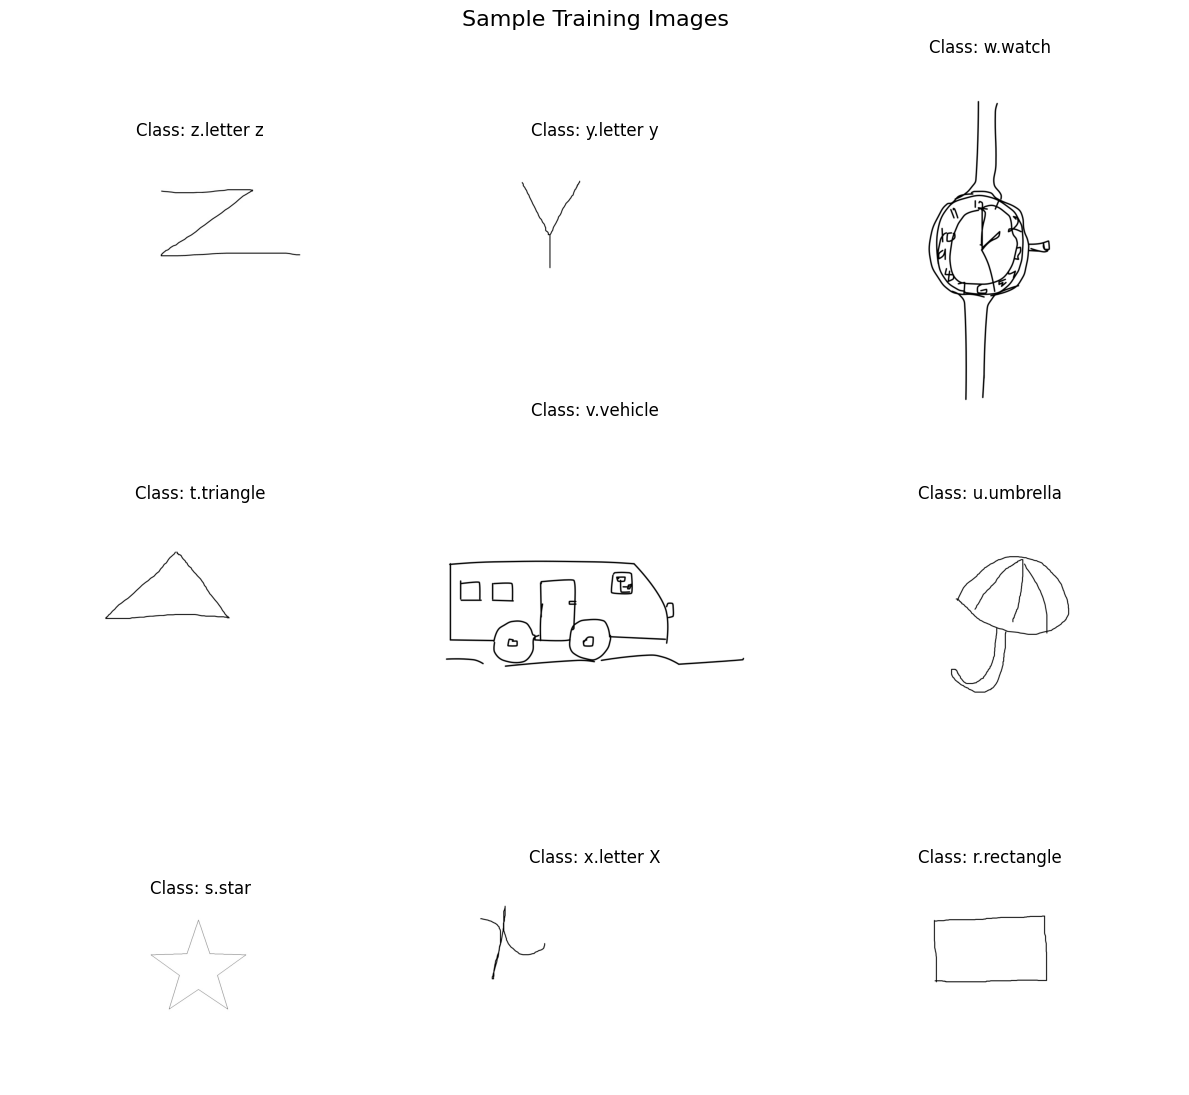

In [ ]:
def visualize_samples(data_path, num_samples=9):
    """Visualize sample images from dataset"""
    classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.suptitle('Sample Training Images', fontsize=16)

    for idx, ax in enumerate(axes.flat):
        if idx < len(classes):
            class_name = classes[idx]
            class_path = os.path.join(data_path, class_name)
            images = os.listdir(class_path)

            if images:
                img_path = os.path.join(class_path, images[0])
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                ax.imshow(img)
                ax.set_title(f'Class: {class_name}')
                ax.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize samples
visualize_samples(train_path)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import missing libraries
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [ ]:
IMG_HEIGHT, IMG_WIDTH = IMAGE_SIZE
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001

print("\n📊 Training Configuration:")
print(f"  Image Size: {IMG_HEIGHT}x{IMG_WIDTH}")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Epochs: {EPOCHS}")
print(f"  Learning Rate: {LEARNING_RATE}")



📊 Training Configuration:
  Image Size: 224x224
  Batch Size: 32
  Epochs: 50
  Learning Rate: 0.001


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data (only rescaling, no augmentation)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

validation_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

# Display dataset info
num_classes = len(train_generator.class_indices)
print(f"\n✓ Data generators created successfully!")
print(f"  Training samples: {train_generator.samples}")
print(f"  Validation samples: {validation_generator.samples}")
print(f"  Number of classes: {num_classes}")
print(f"  Class indices: {train_generator.class_indices}")

Found 520 images belonging to 26 classes.
Found 3120 images belonging to 26 classes.

✓ Data generators created successfully!
  Training samples: 520
  Validation samples: 3120
  Number of classes: 26
  Class indices: {'a.apple': 0, 'b.bag': 1, 'c.circle': 2, 'd.door': 3, 'e.eye': 4, 'f.flower': 5, 'g.glass': 6, 'h.house': 7, 'i.ice cream': 8, 'j.jug': 9, 'k.kite': 10, 'l.leaf': 11, 'm.mango': 12, 'n.net': 13, 'o.number One': 14, 'p.pencil': 15, 'q.letter Q': 16, 'r.rectangle': 17, 's.star': 18, 't.triangle': 19, 'u.umbrella': 20, 'v.vehicle': 21, 'w.watch': 22, 'x.letter X': 23, 'y.letter y': 24, 'z.letter z': 25}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("✓ ImageDataGenerator imported successfully!")

✓ ImageDataGenerator imported successfully!


In [ ]:
#  Build the CNN Model
# ============================================
def build_drawing_cnn(num_classes, img_height, img_width):
    """
    Custom CNN architecture optimized for children's drawing recognition
    """
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                     input_shape=(img_height, img_width, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Block 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create model
model = build_drawing_cnn(num_classes, IMG_HEIGHT, IMG_WIDTH)

# Display model summary
print("\n" + "="*50)
print("MODEL ARCHITECTURE")
print("="*50)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



MODEL ARCHITECTURE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 27,007,802 (103.03 MB)

 Trainable params: 27,004,346 (103.01 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [ ]:
from tensorflow.keras import layers, models

print("✓ Keras models and layers imported!")

✓ Keras models and layers imported!


In [ ]:
#Compile the Model
# ============================================
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy',
             keras.metrics.TopKCategoricalAccuracy(k=3, name='top_3_accuracy'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)

print("\n✓ Model compiled successfully!")



✓ Model compiled successfully!


In [ ]:
# ============================================
# ALL IMPORTS FOR CHROMABLOOM - RUN THIS FIRST!
# ============================================

import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

print("="*60)
print("✓ ALL IMPORTS SUCCESSFUL!")
print(f"✓ TensorFlow: {tf.__version__}")
print(f"✓ GPU: {len(tf.config.list_physical_devices('GPU'))} device(s)")
print("="*60)

✓ ALL IMPORTS SUCCESSFUL!
✓ TensorFlow: 2.19.0
✓ GPU: 1 device(s)


In [ ]:
# STEP 7: Setup Callbacks
# ============================================
# Create directory for saving models
MODEL_SAVE_PATH = '/content/drive/MyDrive/ChromaBloom_Models'
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

# Checkpoint callback - saves best model
checkpoint = ModelCheckpoint(
    filepath=os.path.join(MODEL_SAVE_PATH, 'best_model_epoch_{epoch:02d}_val_acc_{val_accuracy:.3f}.h5'),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Early stopping - prevents overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Learning rate reduction
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# Custom callback to log progress
class TrainingLogger(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\n📈 Epoch {epoch + 1} Summary:")
        print(f"  Train Acc: {logs['accuracy']:.4f} | Val Acc: {logs['val_accuracy']:.4f}")
        print(f"  Train Loss: {logs['loss']:.4f} | Val Loss: {logs['val_loss']:.4f}")

callbacks = [checkpoint, early_stopping, reduce_lr, TrainingLogger()]

print("\n✓ Callbacks configured!")


✓ Callbacks configured!


In [ ]:
# STEP 8: Train the Model
# ============================================
print("\n" + "="*50)
print("STARTING MODEL TRAINING")
print("="*50)
print("This may take a while... Grab a coffee ☕")

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

print("\n✓ Training completed!")


STARTING MODEL TRAINING
This may take a while... Grab a coffee ☕


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.0616 - loss: 4.4743 - precision: 0.0626 - recall: 0.0119 - top_3_accuracy: 0.1516 
Epoch 1: val_accuracy improved from -inf to 0.03846, saving model to /content/drive/MyDrive/ChromaBloom_Models/best_model_epoch_01_val_acc_0.038.h5



📈 Epoch 1 Summary:
  Train Acc: 0.0654 | Val Acc: 0.0385
  Train Loss: 4.3183 | Val Loss: 3.6205
17/17 ━━━━━━━━━━━━━━━━━━━━ 2936s 180s/step - accuracy: 0.0618 - loss: 4.4657 - precision: 0.0641 - recall: 0.0122 - top_3_accuracy: 0.1529 - val_accuracy: 0.0385 - val_loss: 3.6205 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_top_3_accuracy: 0.1154 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.0659 - loss: 3.7621 - precision: 0.0253 - recall: 0.0051 - top_3_accuracy: 0.2472
Epoch 2: val_accuracy did not improve from 0.03846

📈 Epoch 2 Summary:
  Train Acc: 0.0885 | Val Acc: 0.0385
  Train Loss: 3.7366 | Val Loss: 4.3045
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.0672 - loss: 3.7607 - precision: 0.0286 - recall: 0.0058 - top_3_accuracy: 0.2484 - val_accuracy: 0.0385 - val_loss: 4.3045 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_top_3_accuracy: 0.1154 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Check  data paths are correct
print("Checking data paths...")
print(f"Train path exists: {os.path.exists(train_path)}")
print(f"Valid path exists: {os.path.exists(valid_path)}")
print(f"\nTrain path contents: {os.listdir(train_path)}")
print(f"Valid path contents: {os.listdir(valid_path)}")

# Check number of classes and samples
print(f"\nNumber of classes: {len(train_generator.class_indices)}")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")

Checking data paths...
Train path exists: True
Valid path exists: True

Train path contents: ['z.letter z', 'y.letter y', 'w.watch', 't.triangle', 'v.vehicle', 'u.umbrella', 's.star', 'x.letter X', 'r.rectangle', 'q.letter Q', 'p.pencil', 'n.net', 'o.number One', 'l.leaf', 'k.kite', 'm.mango', 'j.jug', 'g.glass', 'i.ice cream', 'h.house', 'f.flower', 'e.eye', 'd.door', 'c.circle', 'b.bag', 'a.apple']
Valid path contents: ['y.letter y', 'z.letter z', 'x.letter X', 'w.watch', 'u.umbrella', 'v.vehicle', 't.triangle', 's.star', 'q.letter Q', 'r.rectangle', 'p.pencil', 'o.number One', 'n.net', 'm.mango', 'k.kite', 'j.jug', 'i.ice cream', 'l.leaf', 'g.glass', 'h.house', 'f.flower', 'e.eye', 'd.door', 'c.circle', 'a.apple', 'b.bag']

Number of classes: 26
Training samples: 520
Validation samples: 3120


In [ ]:
# check  data distribution
print("="*60)
print("DIAGNOSING TRAINING ISSUES")
print("="*60)

DIAGNOSING TRAINING ISSUES


In [ ]:
# Check class distribution
print("\n1️⃣ CLASS DISTRIBUTION:")
print(f"Training classes: {train_generator.class_indices}")
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")
print(f"Samples per class:")
for class_name, class_idx in train_generator.class_indices.items():
    train_count = np.sum(train_generator.classes == class_idx)
    val_count = np.sum(validation_generator.classes == class_idx)
    print(f"  {class_name}: Train={train_count}, Val={val_count}")



1️⃣ CLASS DISTRIBUTION:
Training classes: {'a.apple': 0, 'b.bag': 1, 'c.circle': 2, 'd.door': 3, 'e.eye': 4, 'f.flower': 5, 'g.glass': 6, 'h.house': 7, 'i.ice cream': 8, 'j.jug': 9, 'k.kite': 10, 'l.leaf': 11, 'm.mango': 12, 'n.net': 13, 'o.number One': 14, 'p.pencil': 15, 'q.letter Q': 16, 'r.rectangle': 17, 's.star': 18, 't.triangle': 19, 'u.umbrella': 20, 'v.vehicle': 21, 'w.watch': 22, 'x.letter X': 23, 'y.letter y': 24, 'z.letter z': 25}
Number of training samples: 520
Number of validation samples: 3120
Samples per class:
  a.apple: Train=20, Val=120
  b.bag: Train=20, Val=120
  c.circle: Train=20, Val=120
  d.door: Train=20, Val=120
  e.eye: Train=20, Val=120
  f.flower: Train=20, Val=120
  g.glass: Train=20, Val=120
  h.house: Train=20, Val=120
  i.ice cream: Train=20, Val=120
  j.jug: Train=20, Val=120
  k.kite: Train=20, Val=120
  l.leaf: Train=20, Val=120
  m.mango: Train=20, Val=120
  n.net: Train=20, Val=120
  o.number One: Train=20, Val=120
  p.pencil: Train=20, Val=120
 

In [ ]:
#FIX 1: SIMPLIFIED MODEL ARCHITECTURE
# ============================================
print("\n2️⃣ BUILDING SIMPLIFIED MODEL...")

def build_improved_cnn(num_classes):
    """
    Lighter model with better regularization
    """
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                     input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Dense layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create new model
model = build_improved_cnn(num_classes)
model.summary()


2️⃣ BUILDING SIMPLIFIED MODEL...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,792,218 (98.39 MB)

 Trainable params: 25,791,258 (98.39 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# FIX 2: BETTER OPTIMIZER AND LEARNING RATE
# ============================================
print("\n3️⃣ CONFIGURING OPTIMIZER...")

# Use lower learning rate and better optimizer
initial_learning_rate = 0.0001

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=initial_learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(f"✓ Initial learning rate: {initial_learning_rate}")



3️⃣ CONFIGURING OPTIMIZER...
✓ Initial learning rate: 0.0001


In [ ]:
# FIX 3: IMPROVED DATA AUGMENTATION
# ============================================
print("\n4️⃣ RECREATING DATA GENERATORS...")

# Less aggressive augmentation
train_datagen_fixed = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen_fixed = ImageDataGenerator(rescale=1./255)

# Recreate generators
train_generator_fixed = train_datagen_fixed.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=16,  # Smaller batch size
    class_mode='categorical',
    shuffle=True,
    seed=42
)

validation_generator_fixed = valid_datagen_fixed.flow_from_directory(
    valid_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=16,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

print(f"✓ Batch size reduced to 16")
print(f"✓ Training samples: {train_generator_fixed.samples}")
print(f"✓ Validation samples: {validation_generator_fixed.samples}")


4️⃣ RECREATING DATA GENERATORS...
Found 520 images belonging to 26 classes.
Found 3120 images belonging to 26 classes.
✓ Batch size reduced to 16
✓ Training samples: 520
✓ Validation samples: 3120


In [ ]:
# FIX 4: BETTER CALLBACKS
# ============================================
print("\n5️⃣ SETTING UP CALLBACKS...")

# More patient early stopping
checkpoint_fixed = ModelCheckpoint(
    filepath=os.path.join(MODEL_SAVE_PATH, 'best_model.h5'),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping_fixed = EarlyStopping(
    monitor='val_loss',
    patience=15,  # More patience
    restore_best_weights=True,
    verbose=1
)

# More aggressive learning rate reduction
reduce_lr_fixed = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

callbacks_fixed = [checkpoint_fixed, early_stopping_fixed, reduce_lr_fixed]



5️⃣ SETTING UP CALLBACKS...


In [ ]:
# FIX 5: TRAIN WITH MONITORING
# ============================================
print("\n" + "="*60)
print("STARTING IMPROVED TRAINING")
print("="*60)

EPOCHS_FIXED = 100

history = model.fit(
    train_generator_fixed,
    epochs=EPOCHS_FIXED,
    validation_data=validation_generator_fixed,
    callbacks=callbacks_fixed,
    verbose=1
)



STARTING IMPROVED TRAINING
Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.1237 - loss: 3.3561
Epoch 1: val_accuracy did not improve from 0.11282
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.1231 - loss: 3.3575 - val_accuracy: 0.0385 - val_loss: 3.8917 - learning_rate: 2.4300e-07
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.1088 - loss: 3.6260
Epoch 2: val_accuracy did not improve from 0.11282
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 999ms/step - accuracy: 0.1090 - loss: 3.6217 - val_accuracy: 0.0385 - val_loss: 4.4129 - learning_rate: 2.4300e-07
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.1069 - loss: 3.5614
Epoch 3: val_accuracy did not improve from 0.11282
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 964ms/step - accuracy: 0.1069 - loss: 3.5600 - val_accuracy: 0.0385 - val_loss: 4.8909 - learning_rate: 2.4300e-07
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.0874 - loss: 3.5841
Epoch 4: val_accuracy did not improv

33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1306 - loss: 3.3804 - val_accuracy: 0.1141 - val_loss: 4.1057 - learning_rate: 1.0000e-07
Epoch 16/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.1044 - loss: 3.5431
Epoch 16: val_accuracy did not improve from 0.11410
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1042 - loss: 3.5416 - val_accuracy: 0.1141 - val_loss: 3.9210 - learning_rate: 1.0000e-07
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 1.


In [ ]:
# Run this diagnostic first
print("Dataset Check:")
print(f"Total training samples: {train_generator_fixed.samples}")
print(f"Total validation samples: {validation_generator_fixed.samples}")
print(f"Number of classes: {len(train_generator_fixed.class_indices)}")

# Calculate average per class
avg_per_class = train_generator_fixed.samples / len(train_generator_fixed.class_indices)
print(f"\nAverage samples per class: {avg_per_class:.0f}")

if avg_per_class < 20:
    print("\n⚠️ WARNING: Very small dataset!")
    print("   - Model may not train well")
    print("   - Consider collecting more data")
    print("   - Or reduce number of classes")

Dataset Check:
Total training samples: 520
Total validation samples: 3120
Number of classes: 26

Average samples per class: 20


In [ ]:
print("="*60)
print("TRANSFER LEARNING APPROACH")
print("="*60)

TRANSFER LEARNING APPROACH


In [ ]:
# Use your existing generator
num_classes = len(train_generator_fixed.class_indices)

model_transfer = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

print("\n✓ Transfer learning model created")
print(f"✓ Number of classes: {num_classes}")

# Compile
model_transfer.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_transfer.summary()

# Setup callbacks
checkpoint_transfer = ModelCheckpoint(
    filepath=os.path.join(MODEL_SAVE_PATH, 'transfer_best_model.h5'),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping_transfer = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_transfer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

callbacks_transfer = [checkpoint_transfer, early_stopping_transfer, reduce_lr_transfer]

# Train Phase 1
print("\n" + "="*60)
print("PHASE 1: TRAINING WITH FROZEN BASE")
print("="*60)

history_phase1 = model_transfer.fit(
    train_generator_fixed,
    epochs=30,
    validation_data=validation_generator_fixed,
    callbacks=callbacks_transfer,
    verbose=1
)

print("\n✓ Phase 1 complete!")

# Evaluate
val_loss_p1, val_acc_p1 = model_transfer.evaluate(validation_generator_fixed, verbose=0)
print(f"\nPhase 1 Results:")
print(f"  Validation Accuracy: {val_acc_p1*100:.2f}%")
print(f"  Validation Loss: {val_loss_p1:.4f}")


✓ Transfer learning model created
✓ Number of classes: 26


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,628,314 (10.03 MB)

 Trainable params: 367,258 (1.40 MB)

 Non-trainable params: 2,261,056 (8.63 MB)


PHASE 1: TRAINING WITH FROZEN BASE
Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.1119 - loss: 3.4746
Epoch 1: val_accuracy improved from -inf to 0.32692, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.1142 - loss: 3.4630 - val_accuracy: 0.3269 - val_loss: 2.5950 - learning_rate: 0.0010
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.4395 - loss: 2.0787
Epoch 2: val_accuracy improved from 0.32692 to 0.49776, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4403 - loss: 2.0739 - val_accuracy: 0.4978 - val_loss: 2.1638 - learning_rate: 0.0010
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.5879 - loss: 1.4754
Epoch 3: val_accuracy improved from 0.49776 to 0.53269, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5883 - loss: 1.4729 - val_accuracy: 0.5327 - val_loss: 1.9371 - learning_rate: 0.0010
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.6896 - loss: 1.1476
Epoch 4: val_accuracy improved from 0.53269 to 0.57596, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6891 - loss: 1.1492 - val_accuracy: 0.5760 - val_loss: 1.7527 - learning_rate: 0.0010
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.7311 - loss: 1.0126
Epoch 5: val_accuracy improved from 0.57596 to 0.57853, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7310 - loss: 1.0115 - val_accuracy: 0.5785 - val_loss: 1.6702 - learning_rate: 0.0010
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.7791 - loss: 0.8758
Epoch 6: val_accuracy improved from 0.57853 to 0.59968, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7790 - loss: 0.8744 - val_accuracy: 0.5997 - val_loss: 1.5998 - learning_rate: 0.0010
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.7471 - loss: 0.8616
Epoch 7: val_accuracy did not improve from 0.59968
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 980ms/step - accuracy: 0.7473 - loss: 0.8618 - val_accuracy: 0.5872 - val_loss: 1.5765 - learning_rate: 0.0010
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.7791 - loss: 0.7470
Epoch 8: val_accuracy did not improve from 0.59968
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 985ms/step - accuracy: 0.7794 - loss: 0.7459 - val_accuracy: 0.5920 - val_loss: 1.6036 - learning_rate: 0.0010
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.8091 - loss: 0.6984
Epoch 9: val_accuracy did not improve from 0.59968
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 961ms/step - accuracy: 0.8092 - loss: 0.6978 - val_accuracy: 0.5987 - val_loss: 1.5914 - learning_rate: 0.0010
Epoch 10/30
33/33 ━━━━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8241 - loss: 0.5903 - val_accuracy: 0.6186 - val_loss: 1.5281 - learning_rate: 0.0010
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.7934 - loss: 0.6393
Epoch 11: val_accuracy did not improve from 0.61859
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 990ms/step - accuracy: 0.7937 - loss: 0.6395 - val_accuracy: 0.6141 - val_loss: 1.5399 - learning_rate: 0.0010
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8661 - loss: 0.4968
Epoch 12: val_accuracy improved from 0.61859 to 0.62340, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8658 - loss: 0.4974 - val_accuracy: 0.6234 - val_loss: 1.5870 - learning_rate: 0.0010
Epoch 13/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8611 - loss: 0.4773
Epoch 13: val_accuracy did not improve from 0.62340
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8607 - loss: 0.4788 - val_accuracy: 0.6125 - val_loss: 1.6368 - learning_rate: 0.0010
Epoch 14/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.8748 - loss: 0.4282
Epoch 14: val_accuracy did not improve from 0.62340
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 961ms/step - accuracy: 0.8741 - loss: 0.4299 - val_accuracy: 0.6231 - val_loss: 1.5642 - learning_rate: 0.0010
Epoch 15/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.8400 - loss: 0.5037
Epoch 15: val_accuracy improved from 0.62340 to 0.63558, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5



Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8397 - loss: 0.5049 - val_accuracy: 0.6356 - val_loss: 1.6269 - learning_rate: 0.0010
Epoch 16/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.8664 - loss: 0.4094
Epoch 16: val_accuracy improved from 0.63558 to 0.63878, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8660 - loss: 0.4111 - val_accuracy: 0.6388 - val_loss: 1.6198 - learning_rate: 2.0000e-04
Epoch 17/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.8268 - loss: 0.4942
Epoch 17: val_accuracy did not improve from 0.63878
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8271 - loss: 0.4935 - val_accuracy: 0.6388 - val_loss: 1.6354 - learning_rate: 2.0000e-04
Epoch 18/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8651 - loss: 0.4100
Epoch 18: val_accuracy improved from 0.63878 to 0.64038, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8646 - loss: 0.4113 - val_accuracy: 0.6404 - val_loss: 1.6393 - learning_rate: 2.0000e-04
Epoch 19/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.8714 - loss: 0.4250
Epoch 19: val_accuracy improved from 0.64038 to 0.64071, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8715 - loss: 0.4251 - val_accuracy: 0.6407 - val_loss: 1.6147 - learning_rate: 2.0000e-04
Epoch 20/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8970 - loss: 0.3589
Epoch 20: val_accuracy improved from 0.64071 to 0.64103, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5



Epoch 20: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8964 - loss: 0.3604 - val_accuracy: 0.6410 - val_loss: 1.6192 - learning_rate: 2.0000e-04
Epoch 21/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.8699 - loss: 0.3868
Epoch 21: val_accuracy improved from 0.64103 to 0.64295, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8699 - loss: 0.3880 - val_accuracy: 0.6429 - val_loss: 1.6177 - learning_rate: 4.0000e-05
Epoch 22/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.8905 - loss: 0.3925
Epoch 22: val_accuracy improved from 0.64295 to 0.64327, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8900 - loss: 0.3936 - val_accuracy: 0.6433 - val_loss: 1.6260 - learning_rate: 4.0000e-05
Epoch 23/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.8301 - loss: 0.4824
Epoch 23: val_accuracy did not improve from 0.64327
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 999ms/step - accuracy: 0.8308 - loss: 0.4810 - val_accuracy: 0.6433 - val_loss: 1.6254 - learning_rate: 4.0000e-05
Epoch 24/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8799 - loss: 0.3795
Epoch 24: val_accuracy did not improve from 0.64327
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8802 - loss: 0.3796 - val_accuracy: 0.6423 - val_loss: 1.6304 - learning_rate: 4.0000e-05
Epoch 25/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8937 - loss: 0.4263
Epoch 25: val_accuracy improved from 0.64327 to 0.64455, saving model to /content/drive/MyDrive/ChromaBloom_Models/transfer_best_model.h5



Epoch 25: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8938 - loss: 0.4249 - val_accuracy: 0.6446 - val_loss: 1.6269 - learning_rate: 4.0000e-05
Epoch 26/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.8767 - loss: 0.3766
Epoch 26: val_accuracy did not improve from 0.64455
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 986ms/step - accuracy: 0.8770 - loss: 0.3766 - val_accuracy: 0.6423 - val_loss: 1.6248 - learning_rate: 8.0000e-06
Epoch 27/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.8667 - loss: 0.4648
Epoch 27: val_accuracy did not improve from 0.64455
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 991ms/step - accuracy: 0.8669 - loss: 0.4639 - val_accuracy: 0.6433 - val_loss: 1.6243 - learning_rate: 8.0000e-06
Epoch 28/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9041 - loss: 0.3559
Epoch 28: val_accuracy did not improve from 0.64455
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9040 - loss: 0.35

PHASE 01 COMPLETE
Phase 1 :

Use a pre-trained backbone ( MobileNetV2 )

Keep the backbone frozen

Train only the top classifier layers